# For code explanation: Review "Training a Binary Classifier" section in chapter 3: Classification 

In [97]:
import numpy as np
from numpy.core.numeric import cross
import pandas as pd
from scipy.sparse.construct import rand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

/tmp/ipykernel_11245/2120357507.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric.cross.
  from numpy.core.numeric import cross
/tmp/ipykernel_11245/2120357507.py:4: DeprecationWarning: Please import `rand` from the `scipy.sparse` namespace; the `scipy.sparse.construct` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.sparse.construct import rand


In [98]:
df = pd.read_csv('employee_retention.csv')
#print(df.describe()) uncomment to see some data describtion
# df.head() # uncomment to see first few rows of the data

In [99]:
#some data cleaning


#separate features/attributes from class_label
X = df.iloc[:, 0:7]
y = df.iloc[:,7]
#print (X)
#print(y)

In [100]:
#split data into training and test sets, replace ??? with the desired percentage of data split for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Use the schotastic gradient descent classifier and fit the data: USE random_state value of your choice
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [102]:
# Test the trained model on the testing set, X_test
y_pred = model.predict(X_test)
y_pred[:10]  # show first 10 predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
#score the predictions using X_test and y_test
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7646666666666667


In [104]:
# train the model using a 10-fold cross-validation training using accuracy for scoring
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation accuracies: [0.7525     0.78       0.73       0.76416667 0.62666667 0.65916667
 0.78666667 0.75833333 0.76       0.76146789]
Mean CV Accuracy: 0.7378967889908257


In [105]:
# run a prediction on the cross_val_predict() on X_train and y_train for k=10 folds
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

Confusion Matrix:
 [[8063 1071]
 [2074  791]]


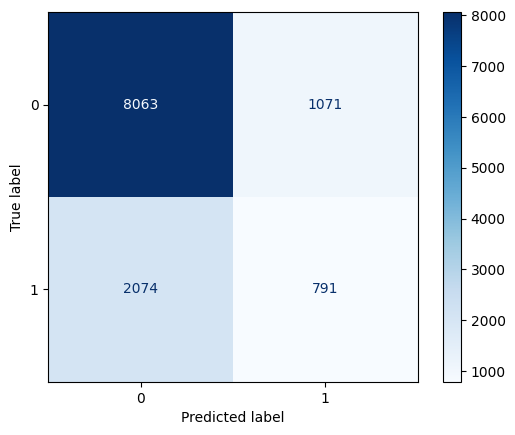

In [106]:
# generate the confusion matrix - Check Confusion Matrices section in chapter 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

print("Confusion Matrix:\n", cm)

In [107]:
# Calculate the precision using y_train and y_train_pred 
from sklearn.metrics import precision_score
precision = precision_score(y_train, y_train_pred)
print("Precision:", precision)

Precision: 0.424812030075188


In [108]:
# Calculate the recall using y_train and y_train_pred
from sklearn.metrics import recall_score
recall = recall_score(y_train, y_train_pred)
print("Recall:", recall)

Recall: 0.27609075043630016


In [109]:
# Calculate the F1 score using y_train and y_train_pred 
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_train_pred)
print("F1 Score:", f1)

F1 Score: 0.3346731542204358


In [110]:
# Calculate the y_scores 
y_scores = cross_val_predict(model, X_train, y_train, cv=10, method="decision_function")

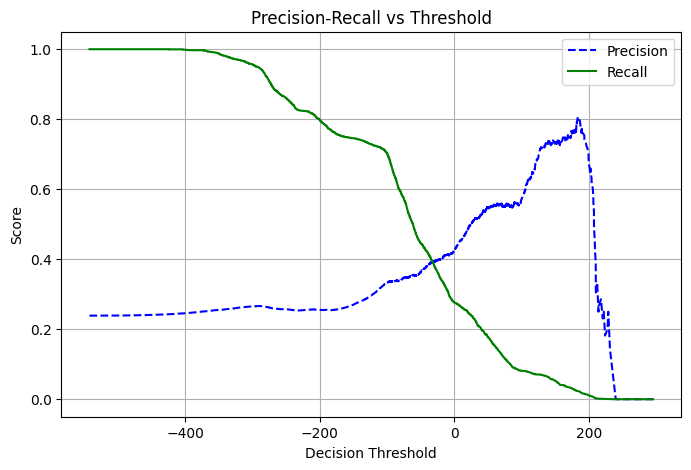

In [111]:
# calculate the precisions, reecalls, and thresholds 
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Generate precision, recall, and threshold values
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.title("Precision-Recall vs Threshold")
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


In [112]:

# In employee retention, recall (identifying employees likely to leave) is more critical than precision.
# Missing an at-risk employee (false negative) is more costly than mistakenly flagging a loyal one.


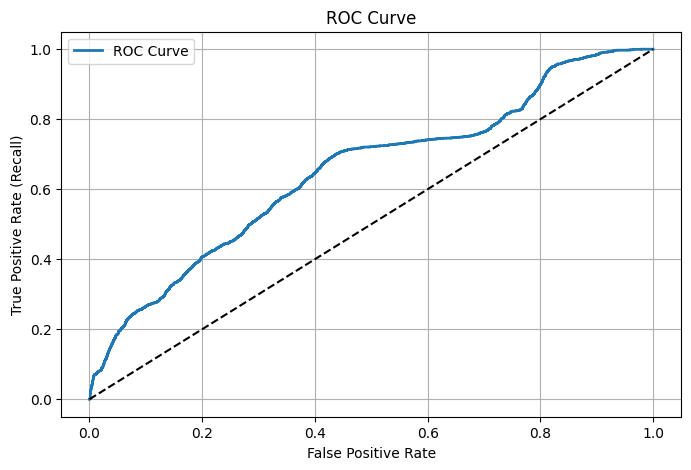

In [113]:
#generate the ROC curve 
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [114]:
# Calulate the area under the curve 
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores)
print("Area Under the Curve (AUC):", auc)


Area Under the Curve (AUC): 0.6493905363272678


In [115]:
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import precision_recall_curve

# Recompute precision, recall, and thresholds using the same y_train and y_scores
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

with PdfPages("employee_retention_results.pdf") as pdf:
    # --- Confusion Matrix ---
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    pdf.savefig()
    plt.close()

    # --- Precision-Recall Curve ---
    plt.figure(figsize=(8,5))
    n = len(thresholds)
    plt.plot(thresholds, precisions[:n], "b--", label="Precision")
    plt.plot(thresholds, recalls[:n], "g-", label="Recall")
    plt.title("Precision-Recall vs Threshold")
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    pdf.savefig()
    plt.close()

    # --- ROC Curve ---
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
    plt.plot([0,1], [0,1], "k--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    pdf.savefig()
    plt.close()

print("✅ PDF report 'employee_retention_results.pdf' generated successfully.")


✅ PDF report 'employee_retention_results.pdf' generated successfully.
